# Netlist

> SAX Netlist Models

The best introduction to SAX netlists for a sample GDSFactory component.

In [2]:
import os, sys; sys.stderr = open(os.devnull, "w")

In [3]:
import os
import re
from enum import Enum
from functools import lru_cache, partial
from typing import Any, Callable, Dict, Optional, Union

import black
import numpy as np
import yaml
from sax.utils import clean_string, get_settings, hash_dict

In [4]:
try:
    from pydantic.v1 import BaseModel as _BaseModel
    from pydantic.v1 import Extra, Field, ValidationError, validator
except ImportError:
    from pydantic import BaseModel as _BaseModel
    from pydantic import Extra, Field, ValidationError, validator

In [5]:
class BaseModel(_BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True
        json_encoders = {np.ndarray: lambda arr: np.round(arr, 12).tolist()}

    def __repr__(self):
        s = super().__repr__()
        s = black.format_str(s, mode=black.Mode())
        return s

    def __str__(self):
        return self.__repr__()

    def __hash__(self):
        return hash_dict(self.dict())

In [6]:

# The models were generated as follows:

# import io
# import json
# from contextlib import redirect_stdout
# from urllib.request import urlopen
# 
# import datamodel_code_generator as dcg
# 
# NETLIST_SCHEMA_URL = "https://raw.githubusercontent.com/gdsfactory/gdsfactory/v6.3.5/gdsfactory/tests/schemas/netlist.json" # TODO: update to latest gdsfactory version.
# 
# 
# def download_schema(url=NETLIST_SCHEMA_URL):
#     response = urlopen(url)
#     json_text = response.read().decode()
#     schema_dict = json.loads(json_text)
#     return schema_dict
# 
# 
# def generate_models():
#     schema_dict = download_schema()
#     json_text = json.dumps(schema_dict)
#     buf = io.StringIO()
#     with redirect_stdout(buf):
#         dcg.generate(input_=json_text)
#     content = buf.getvalue()
#     content = content.replace(
#         "extra = Extra.forbid",
#         (
#             "extra = Extra.ignore\n"
#             "        allow_mutation = False\n"
#             "        frozen = True\n"
#             "        json_encoders = {np.ndarray: lambda arr: np.round(arr, 12).tolist()}"
#         ),
#     )
#     content = (
#         content.replace("ComponentModel", "Component")
#         .replace("PlacemetModel", "Placement")
#         .replace("RouteModel", "Route")
#         .replace("NetlistModel", "Netlist")
#         .replace("PlacementModel", "Placement")
#     )
#     return content
# 
# 
# print(generate_models())

This was autogenerated from the gdsfactory netlist json spec. Only a few validators were added and a few irrelevant fields were disabled.

In [7]:

class Component(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True
        json_encoders = {np.ndarray: lambda arr: np.round(arr, 12).tolist()}

    component: Union[str, Dict[str, Any]] = Field(..., title="Component")
    settings: Optional[Dict[str, Any]] = Field(None, title="Settings")

    # this was added:
    @validator("component")
    def validate_component_name(cls, value):
        if "," in value:
            raise ValueError(
                f"Invalid component string. Should not contain ','. Got: {value}"
            )
        return clean_string(value)
    

class PortEnum(Enum):
    ce = "ce"
    cw = "cw"
    nc = "nc"
    ne = "ne"
    nw = "nw"
    sc = "sc"
    se = "se"
    sw = "sw"
    center = "center"
    cc = "cc"


class Placement(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True
        json_encoders = {np.ndarray: lambda arr: np.round(arr, 12).tolist()}

    x: Optional[Union[str, float]] = Field(0, title="X")
    y: Optional[Union[str, float]] = Field(0, title="Y")
    xmin: Optional[Union[str, float]] = Field(None, title="Xmin")
    ymin: Optional[Union[str, float]] = Field(None, title="Ymin")
    xmax: Optional[Union[str, float]] = Field(None, title="Xmax")
    ymax: Optional[Union[str, float]] = Field(None, title="Ymax")
    dx: Optional[float] = Field(0, title="Dx")
    dy: Optional[float] = Field(0, title="Dy")
    port: Optional[Union[str, PortEnum]] = Field(None, title="Port")
    rotation: Optional[int] = Field(0, title="Rotation")
    mirror: Optional[bool] = Field(False, title="Mirror")


class Route(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True
        json_encoders = {np.ndarray: lambda arr: np.round(arr, 12).tolist()}

    links: Dict[str, str] = Field(..., title="Links")
    settings: Optional[Dict[str, Any]] = Field(None, title="Settings")
    routing_strategy: Optional[str] = Field(None, title="Routing Strategy")


class Netlist(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True
        json_encoders = {np.ndarray: lambda arr: np.round(arr, 12).tolist()}

    instances: Dict[str, Component] = Field(..., title="Instances")
    connections: Optional[Dict[str, str]] = Field(None, title="Connections")
    ports: Optional[Dict[str, str]] = Field(None, title="Ports")
    placements: Optional[Dict[str, Placement]] = Field(None, title="Placements")

    # these were removed (irrelevant for SAX):

    # routes: Optional[Dict[str, Route]] = Field(None, title='Routes')
    # name: Optional[str] = Field(None, title='Name')
    # info: Optional[Dict[str, Any]] = Field(None, title='Info')
    # settings: Optional[Dict[str, Any]] = Field(None, title='Settings')
    # pdk: Optional[str] = Field(None, title='Pdk')

    # these are extra additions:

    @validator("instances", pre=True)
    def coerce_different_type_instance_into_component_model(cls, instances):
        new_instances = {}
        for k, v in instances.items():
            if isinstance(v, str):
                v = {
                    "component": v,
                    "settings": {},
                }
            new_instances[k] = v
                
        return new_instances
    
    @staticmethod
    def clean_instance_string(value):
        if "," in value:
            raise ValueError(
                f"Invalid instance string. Should not contain ','. Got: {value}"
            )
        return clean_string(value)

    @validator("instances")
    def validate_instance_names(cls, instances):
        return {cls.clean_instance_string(k): v for k, v in instances.items()}

    @validator("placements")
    def validate_placement_names(cls, placements):
        return {cls.clean_instance_string(k): v for k, v in placements.items()}

    @classmethod
    def clean_connection_string(cls, value):
        *comp, port = value.split(",")
        comp = cls.clean_instance_string(",".join(comp))
        return f"{comp},{port}"

    @validator("connections")
    def validate_connection_names(cls, connections):
        return {
            cls.clean_connection_string(k): cls.clean_connection_string(v)
            for k, v in connections.items()
        }

    @validator("ports")
    def validate_port_names(cls, ports):
        return {
            cls.clean_instance_string(k): cls.clean_connection_string(v)
            for k, v in ports.items()
        }

We add an additional model to represent recursive netlists:

In [8]:
    
class RecursiveNetlist(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True
        
    __root__: Dict[str, Netlist]

Let's create a simple recursive netlist with gdsfactory.

:::{note}
We are using gdsfactory to create our netlist because it allows us to see the circuit we want to simulate and because we're striving to have a compatible netlist implementation in SAX.

However... gdsfactory is not a dependency of SAX. You can also define your circuits by hand (see [SAX Quick Start](../examples/01_quick_start.ipynb) or you can use another tool to programmatically construct your netlists.
:::

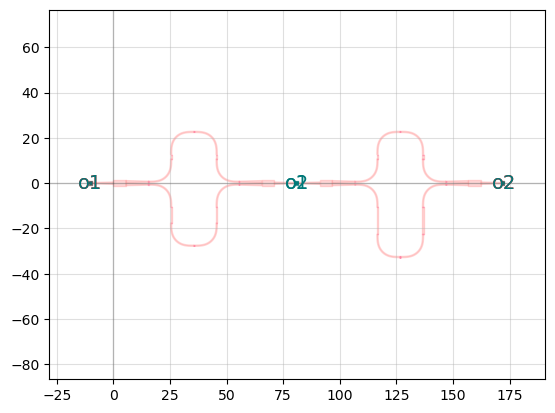

In [9]:
import gdsfactory as gf
from gdsfactory.components import mzi
from gdsfactory.get_netlist import get_netlist_recursive, get_netlist
from gdsfactory.quickplotter import quickplot
from IPython.display import display

@gf.cell
def twomzi():
    c = gf.Component()
    
    # instances
    mzi1 = mzi(delta_length=10)
    mzi2 = mzi(delta_length=20)
    
    # references
    mzi1_ = (c << mzi1)
    mzi2_ = (c << mzi2)
    
    # connections
    mzi2_.connect('o1', mzi1_.ports['o2'])
    
    # ports
    c.add_port('o1', port=mzi1_.ports['o1'])
    c.add_port('o2', port=mzi2_.ports['o2'])
    return c

comp  = twomzi()
quickplot(comp);
recnet = RecursiveNetlist.parse_obj(get_netlist_recursive(comp, get_netlist_func=partial(get_netlist, full_settings=True)))
flatnet = recnet.__root__['mzi_delta_length10']

Which gives the recursive netlist (go on to [Circuit](07_circuit.ipynb) from here.):

:::{eval-rst}
.. autofunction:: sax.netlist.netlist
:::


In [10]:

def netlist(dic: Dict) -> RecursiveNetlist:
    if isinstance(dic, RecursiveNetlist):
        return dic
    elif isinstance(dic, Netlist):
        dic = dic.dict()
    try:
        flat_net = Netlist.parse_obj(dic)
        net = RecursiveNetlist.parse_obj({'top_level': flat_net})
    except ValidationError:
        net = RecursiveNetlist.parse_obj(dic)
    return net

## Load Netlist from folder

:::{eval-rst}
.. autofunction:: sax.netlist.load_netlist
:::


In [11]:
@lru_cache()
def load_netlist(pic_path) -> Netlist:
    with open(pic_path, "r") as file:
        net = yaml.safe_load(file.read())
    return Netlist.parse_obj(net)

:::{eval-rst}
.. autofunction:: sax.netlist.load_recursive_netlist
:::


In [12]:
@lru_cache()
def load_recursive_netlist(pic_path, ext='.yml'):
    folder_path = os.path.dirname(os.path.abspath(pic_path))
    _clean_string = lambda path: clean_string(re.sub(ext, "", os.path.split(path)[-1]))
    netlists = {_clean_string(pic_path): None} # the circuit we're interested in should come first.
    for filename in os.listdir(folder_path):
        path = os.path.join(folder_path, filename)
        if not os.path.isfile(path) or not path.endswith(ext):
            continue
        netlists[_clean_string(path)] = load_netlist(path)
    return RecursiveNetlist.parse_obj(netlists)

:::{eval-rst}
.. autofunction:: sax.netlist.get_netlist_instances_by_prefix
:::


In [13]:
def get_netlist_instances_by_prefix(
        recursive_netlist: RecursiveNetlist,
        prefix: str,
):
    """
    Returns a list of all instances with a given prefix in a recursive netlist.

    Args:
        recursive_netlist: The recursive netlist to search.
        prefix: The prefix to search for.

    Returns:
        A list of all instances with the given prefix.
    """
    recursive_netlist_root = recursive_netlist.dict()["__root__"]
    result = []
    for key in recursive_netlist_root.keys():
        if key.startswith(prefix):
            result.append(key)
    return result

:::{eval-rst}
.. autofunction:: sax.netlist.get_component_instances
:::


In [14]:
def get_component_instances(
        recursive_netlist: RecursiveNetlist,
        top_level_prefix: str,
        component_name_prefix: str,
):
    """
    Returns a dictionary of all instances of a given component in a recursive netlist.

    Args:
        recursive_netlist: The recursive netlist to search.
        top_level_prefix: The prefix of the top level instance.
        component_name_prefix: The name of the component to search for.

    Returns:
        A dictionary of all instances of the given component.
    """
    instance_names = []
    recursive_netlist_root = recursive_netlist.dict()["__root__"]
    top_level_prefix = get_netlist_instances_by_prefix(recursive_netlist, prefix=top_level_prefix)[
        0
    ]  # Should only be one in a netlist-to-digraph. Can always be very specified.
    for key in recursive_netlist_root[top_level_prefix]["instances"]:
        if recursive_netlist_root[top_level_prefix]["instances"][key]["component"].startswith(component_name_prefix):
            # Note priority encoding on match.
            instance_names.append(key)
    return {component_name_prefix: instance_names}

:::{eval-rst}
.. autofunction:: sax.netlist.get_netlist_instances_by_prefix
:::


In [15]:
def get_netlist_instances_by_prefix(
        recursive_netlist: RecursiveNetlist,
        prefix: str,
):
    """
    Returns a list of all instances with a given prefix in a recursive netlist.

    Args:
        recursive_netlist: The recursive netlist to search.
        prefix: The prefix to search for.

    Returns:
        A list of all instances with the given prefix.
    """
    recursive_netlist_root = recursive_netlist.dict()["__root__"]
    result = []
    for key in recursive_netlist_root.keys():
        if key.startswith(prefix):
            result.append(key)
    return result

:::{eval-rst}
.. autofunction:: sax.netlist.get_component_instances
:::


In [16]:
def get_component_instances(
        recursive_netlist: RecursiveNetlist,
        top_level_prefix: str,
        component_name_prefix: str,
):
    """
    Returns a dictionary of all instances of a given component in a recursive netlist.

    Args:
        recursive_netlist: The recursive netlist to search.
        top_level_prefix: The prefix of the top level instance.
        component_name_prefix: The name of the component to search for.

    Returns:
        A dictionary of all instances of the given component.
    """
    instance_names = []
    recursive_netlist_root = recursive_netlist.dict()["__root__"]
    top_level_prefix = get_netlist_instances_by_prefix(recursive_netlist, prefix=top_level_prefix)[
        0
    ]  # Should only be one in a netlist-to-digraph. Can always be very specified.
    for key in recursive_netlist_root[top_level_prefix]["instances"]:
        if recursive_netlist_root[top_level_prefix]["instances"][key]["component"].startswith(component_name_prefix):
            # Note priority encoding on match.
            instance_names.append(key)
    return {component_name_prefix: instance_names}